# Tutorial: distortion function

The distortion can be assigned to the optics of the telescope. The distortion function should receive an array with a shape of $(2, N)$. The first and second elements are the x- and y-positions on the focal plane, respectively. An array with the same shape is returned, which contains the coordinates with distortion.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from warpfield.telescope import display_sources
from warpfield.telescope.jasmine import get_jasmine

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude, Angle
from astropy.time import Time
import astropy.units as u

An artificial source set is used in this notebook. Define a grid in a &pm;0.3&deg; region around the origin of the ICRS frame.

In [3]:
arr = np.linspace(-0.3, 0.3, 30)
xx,yy = np.meshgrid(arr,arr)
ra  = [x*u.degree for x in xx.flat]
dec = [y*u.degree for y in yy.flat] 
src = SkyCoord(ra, dec, frame='icrs')

The telescope is pointed toward the origin of the ICRS frame. The position angle is 0.0&deg;.

In [4]:
pointing = SkyCoord(0.0*u.deg,0.0*u.deg, frame='icrs')
position_angle = Angle(0.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle)

The figure below shows the on-sky distribution of the artifical sources. A well-organized grid pattern is recognized.

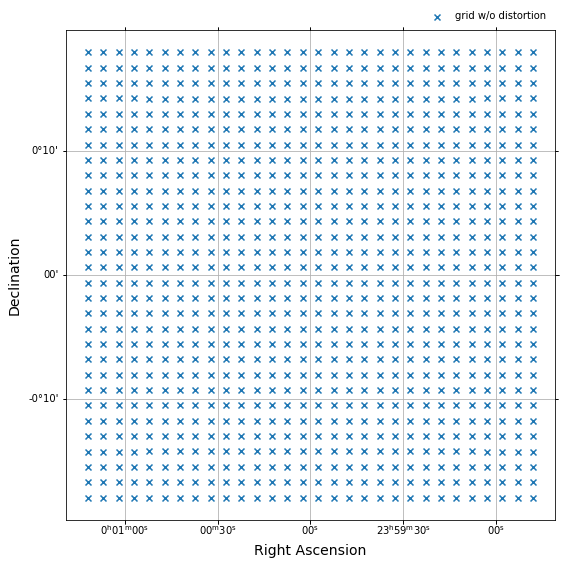

In [5]:
ax = display_sources(pointing, src, title='grid w/o distortion')

The `identity_transformation` is assigned to the optics if not specified.

In [6]:
jasmine.optics.distortion

<function warpfield.telescope.distortion.identity.identity_transformation(position)>

This function does not change the given position at all. Thus, the source distribution on the plane is the same as on the sky.

/home/rohsawa/.pyenv/versions/3.9.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


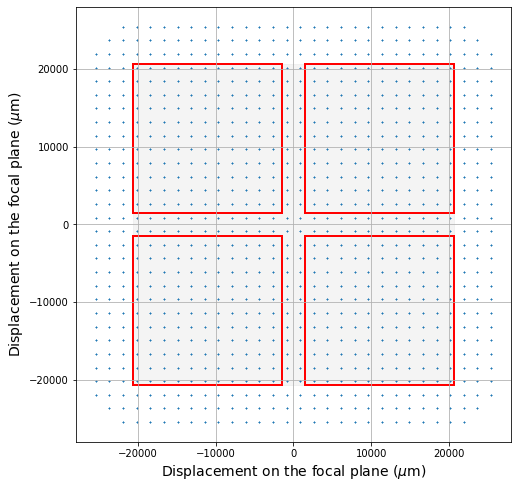

In [7]:
jasmine.display_focal_plane(src)

The module provide the class `SipDistortion` to generate a distortion function defined by the SIP convention. The distortion function is defined as follows:

$$
f(x,y) = \sum_{0 \le i{+}j \le N} A_{i,j} x^i y^j, \quad
g(x,y) = \sum_{0 \le i{+}j \le N} B_{i,j} x^i y^j,
$$

where $N$ is the maximum order of the distortion, and $f(x,y)$ and $g(x,y)$ are the displacements of the x- and y-coordinates, respectively. The arguments of `SipDistortion` are the order $N$ and two $(N+1, N+1)$ arrays.

/home/rohsawa/.pyenv/versions/3.9.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


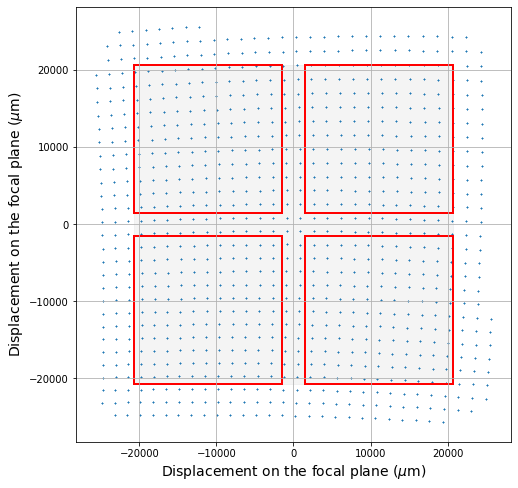

In [8]:
from warpfield.telescope.distortion.sip import SipDistortion
sip_a = np.zeros((6,6))
sip_b = np.zeros((6,6))
sip_a[2,0] = -1e-6
sip_a[1,1] = -1e-6
sip_a[0,2] =  1e-6
sip_b[2,0] =  1e-6
sip_b[1,1] = -1e-6
sip_b[0,2] = -1e-6
distortion = SipDistortion(5, sip_a, sip_b)
jasmine.set_distortion(distortion)
jasmine.display_focal_plane(src)

The distortion center of `SipDistortion` are alined to the center of the focal plane. The distortion center can be displaced by using the class `SipModDistortion` instead of `SipDistortion`.

/home/rohsawa/.pyenv/versions/3.9.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


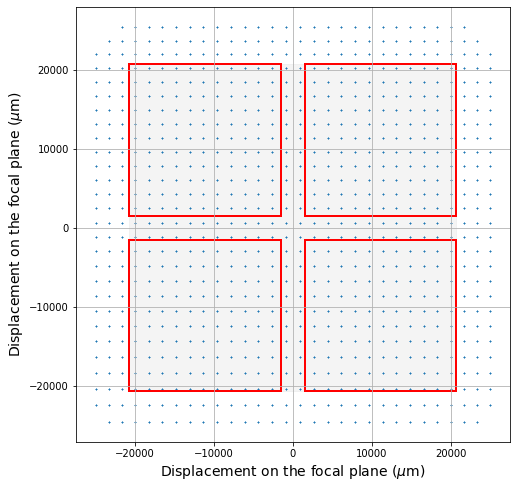

In [9]:
from warpfield.telescope.distortion.sip import AltSipDistortion
sip_a = np.zeros((6,6))
sip_b = np.zeros((6,6))
sip_c = np.array([0,20000])
sip_a[3,0] =  3e-11
sip_b[0,3] = -3e-11
distortion = AltSipDistortion(5, sip_c, sip_a, sip_b)
jasmine.set_distortion(distortion)
jasmine.display_focal_plane(src)